In [8]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [41]:
path = Path("/Volumes/LaCie/ssp5-8.5/axial/thickness_inversion_params_only")

def get_dthk(filepath, ref_time):
    ds = xr.open_dataset(filepath)
    thk = ds.thickness
    dthk = thk.sel(time=ref_time) - thk.isel(time=0)
    return dthk

dthk_2100_list = [get_dthk(file, 2100) for file in sorted(path.glob("*.nc"))]
dthk_2100 = xr.concat(dthk_2100_list, dim="ensemble_member")

In [42]:
dthk_2300_list = [get_dthk(file, 2300) for file in sorted(path.glob("*.nc"))]
dthk_2300 = xr.concat(dthk_2300_list, dim="ensemble_member")

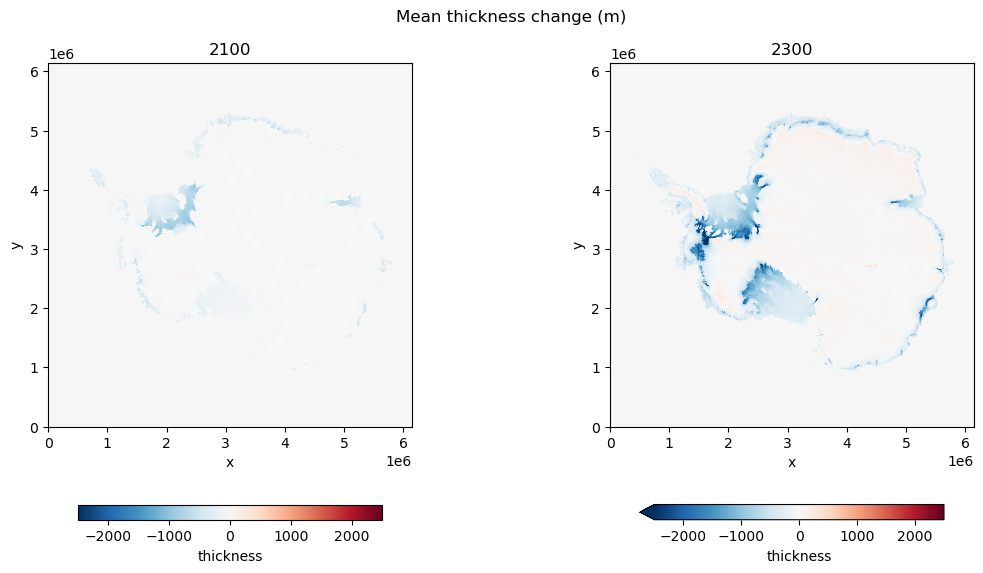

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

dthk_2100.mean(dim="ensemble_member").plot(ax=ax[0], vmin=-2500, vmax=2500, cmap="RdBu_r", cbar_kwargs={"location": "bottom", "shrink": 0.5})
dthk_2300.mean(dim="ensemble_member").plot(ax=ax[1], vmin=-2500, vmax=2500, cmap="RdBu_r", cbar_kwargs={"location": "bottom", "shrink": 0.5})
fig.suptitle("Mean thickness change (m)")

ax[0].set_title("2100")
ax[1].set_title("2300")

for a in ax:
    a.set_aspect('equal')

plt.tight_layout()

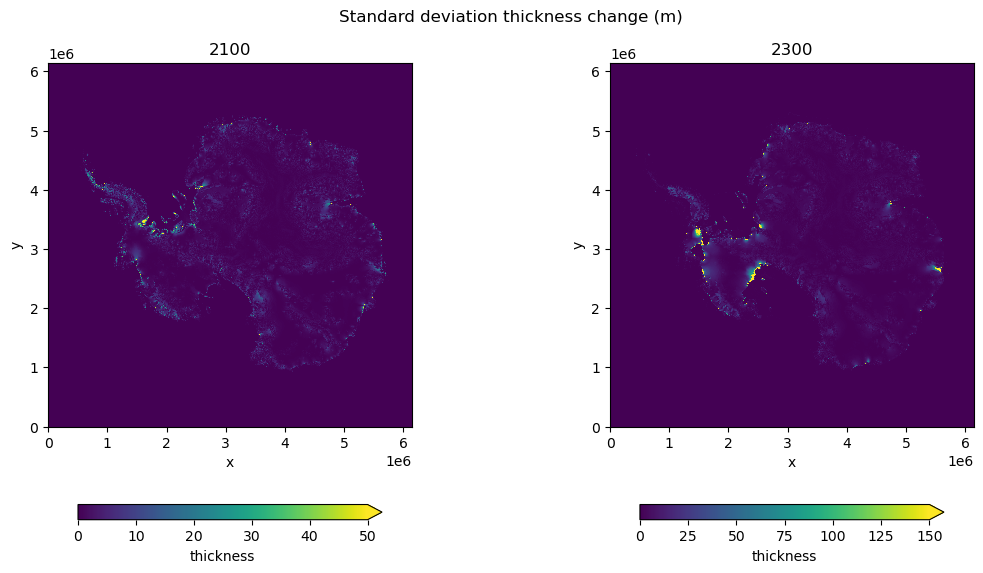

In [49]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

dthk_2100.std(dim="ensemble_member").plot(ax=ax[0], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=50)
dthk_2300.std(dim="ensemble_member").plot(ax=ax[1], cbar_kwargs={"location": "bottom", "shrink": 0.5}, vmax=150)
fig.suptitle("Standard deviation thickness change (m)")

ax[0].set_title("2100")
ax[1].set_title("2300")

for a in ax:
    a.set_aspect('equal')

plt.tight_layout()